In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
#loading data
data = load_breast_cancer()
X=data.data
y=data.target

In [ ]:
#splitting data
train_X, val_X, train_y, val_y = train_test_split(X, y)
#applying model
model = DecisionTreeClassifier(random_state=1)
#fitting model
model = model.fit(train_X, train_y)

In [ ]:
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
#calculate the importance of features in model by shuffling
perm = PermutationImportance(model, random_state=0)
perm = perm.fit(val_X, val_y)
#show the weights (accuracy ± variance) for every feature
eli5.show_weights(perm, feature_names = data.feature_names,top=30) 
#since len(data.feature_names)=30 we have assigned it to top to get all the features.

Weight,Feature
0.1049 ± 0.0343,worst radius
0.0951 ± 0.0274,worst concave points
0.0559 ± 0.0293,worst concavity
0.0517 ± 0.0326,area error
0.0392 ± 0.0168,mean concavity
0.0266 ± 0.0206,mean texture
0.0168 ± 0.0209,worst texture
0.0084 ± 0.0105,mean symmetry
0.0084 ± 0.0105,smoothness error
0.0070 ± 0.0000,texture error


In [ ]:
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
pdp_model = GradientBoostingClassifier()
pdp_model.fit(X,y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; The function ensemble.plot_partial_dependence has been deprecated in favour of sklearn.inspection.plot_partial_dependence in  0.21 and will be removed in 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function partial_dependence is deprecated; The function ensemble.partial_dependence has been deprecated in favour of inspection.partial_dependence in 0.21 and will be removed in 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function partial_dependence is deprecated; The function ensemble.partial_dependence has been deprecated in favour of inspection.partial_dependence in 0.21 and will be removed in 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dis

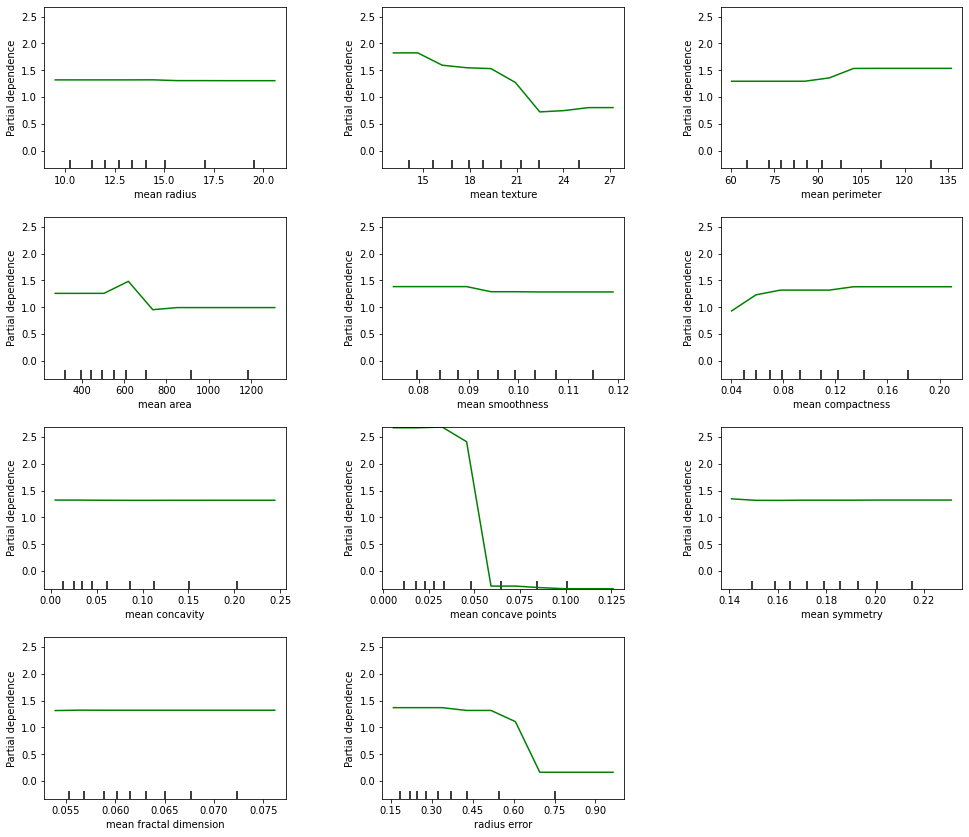

In [ ]:
fig,ax = plot_partial_dependence(pdp_model,       
                                   features=[0,1,2,3,4,5,6,7,8,9,10], # first 11 columns
                                   X=X,            # required data 
                                   feature_names=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity',
                                    'mean concave points', 'mean symmetry', 'mean fractal dimension','radius error'], # labels on graphs
                                   grid_resolution=10) # number of values to plot on x axis
#resizing                                   
fig.set_figwidth(15)
fig.set_figheight(20)

In [ ]:
!pip install pdpbox

In [ ]:
from pdpbox import pdp, get_dataset, info_plots

In [ ]:
#converting into dataframe
df=pd.DataFrame(data.data,columns=data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


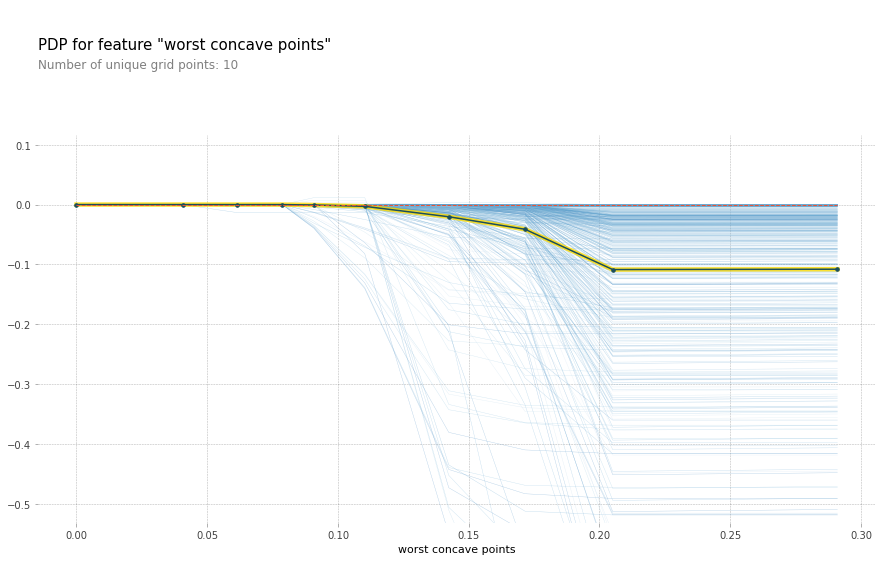

In [ ]:
ice = pdp.pdp_isolate(model=pdp_model, dataset=df, model_features=df.columns.tolist(), feature='worst concave points')
pdp.pdp_plot(ice, 'worst concave points', plot_lines=True)
plt.show()

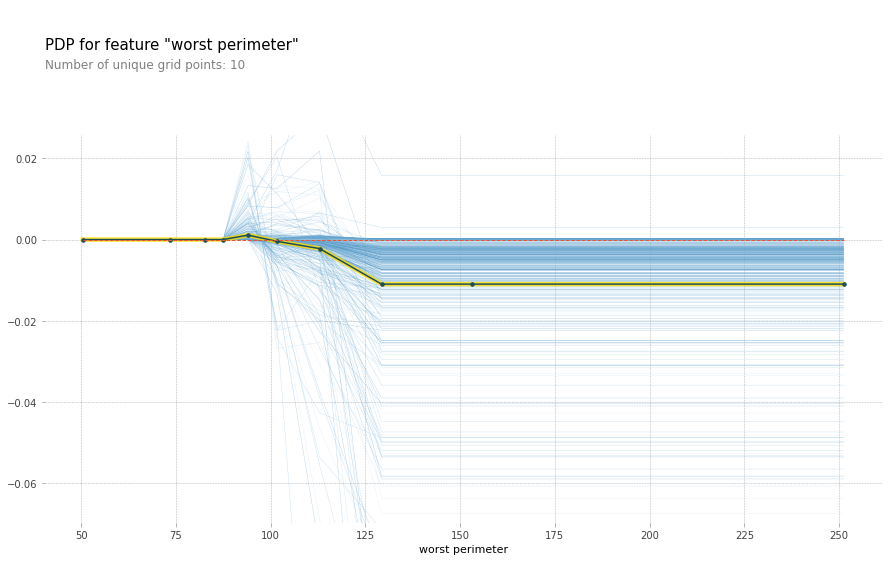

In [ ]:
ice = pdp.pdp_isolate(model=pdp_model, dataset=df, model_features=df.columns.tolist(), feature='worst perimeter')
pdp.pdp_plot(ice, 'worst perimeter', plot_lines=True)
plt.show()

In [ ]:
!pip install skater

from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

In [ ]:
#interpreter is an object of interpretation
interpreter = Interpretation(training_data=val_X, training_labels=val_y, feature_names=data.feature_names)
# val_X , val_y are the testing datasets and data.feature_names will return the column names to parameter feature_names 
global_model = InMemoryModel(pdp_model.predict_proba, examples=train_X, target_names=['Benign', 'Malignant'])
#The predicted probabilities of classifier model are passed in the parameter

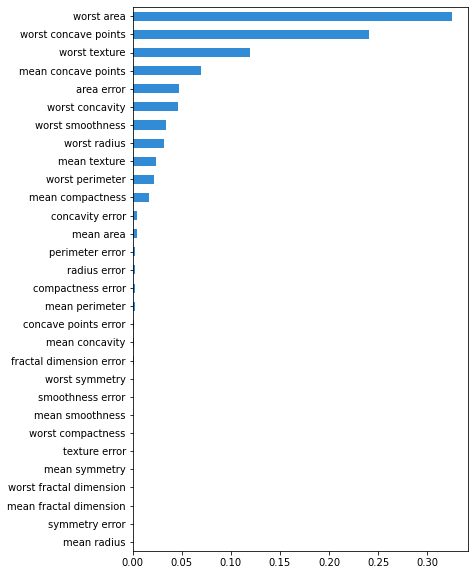

In [ ]:
fig,ax = interpreter.feature_importance.plot_feature_importance(global_model, progressbar=False)#plotting feature importance
fig.set_figheight(10)#for resizing